<a href="https://colab.research.google.com/github/ryansong122/TryAGain_Public/blob/main/BBQ_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}

!pip install roboflow==1.1.48 --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dtwNUuXg0FCzWcJKWYI0")
project = rf.workspace("softstarglory").project("bbq_train")
version = project.version(6)
dataset = version.download("yolov8")





/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BBQ_train-6 in yolov8:: 100%|██████████| 291/291 [00:00<00:00, 3798.37it/s]


In [ ]:
!pip install -U ultralytics==8.3.48

In [ ]:
# CheckNvidia GPU
import torch
from torch import nn

print(f"\n cuda is available:{torch.cuda.is_available()}",
f"\n device count: {torch. cuda. device_count()}",
f"\n device name: {torch.cuda.get_device_name(0)}",)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = torch.tensor([1, 2, 3], device=device)

In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=600 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/BBQ_train-6/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

In [15]:
!ls runs/detect/train3

args.yaml					    P_curve.png		train_batch121.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch122.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1733840820.4e0d53c7bd13.8003.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch120.jpg	weights


In [17]:
!ls runs/detect/train3/weights

best.pt  last.pt


/content


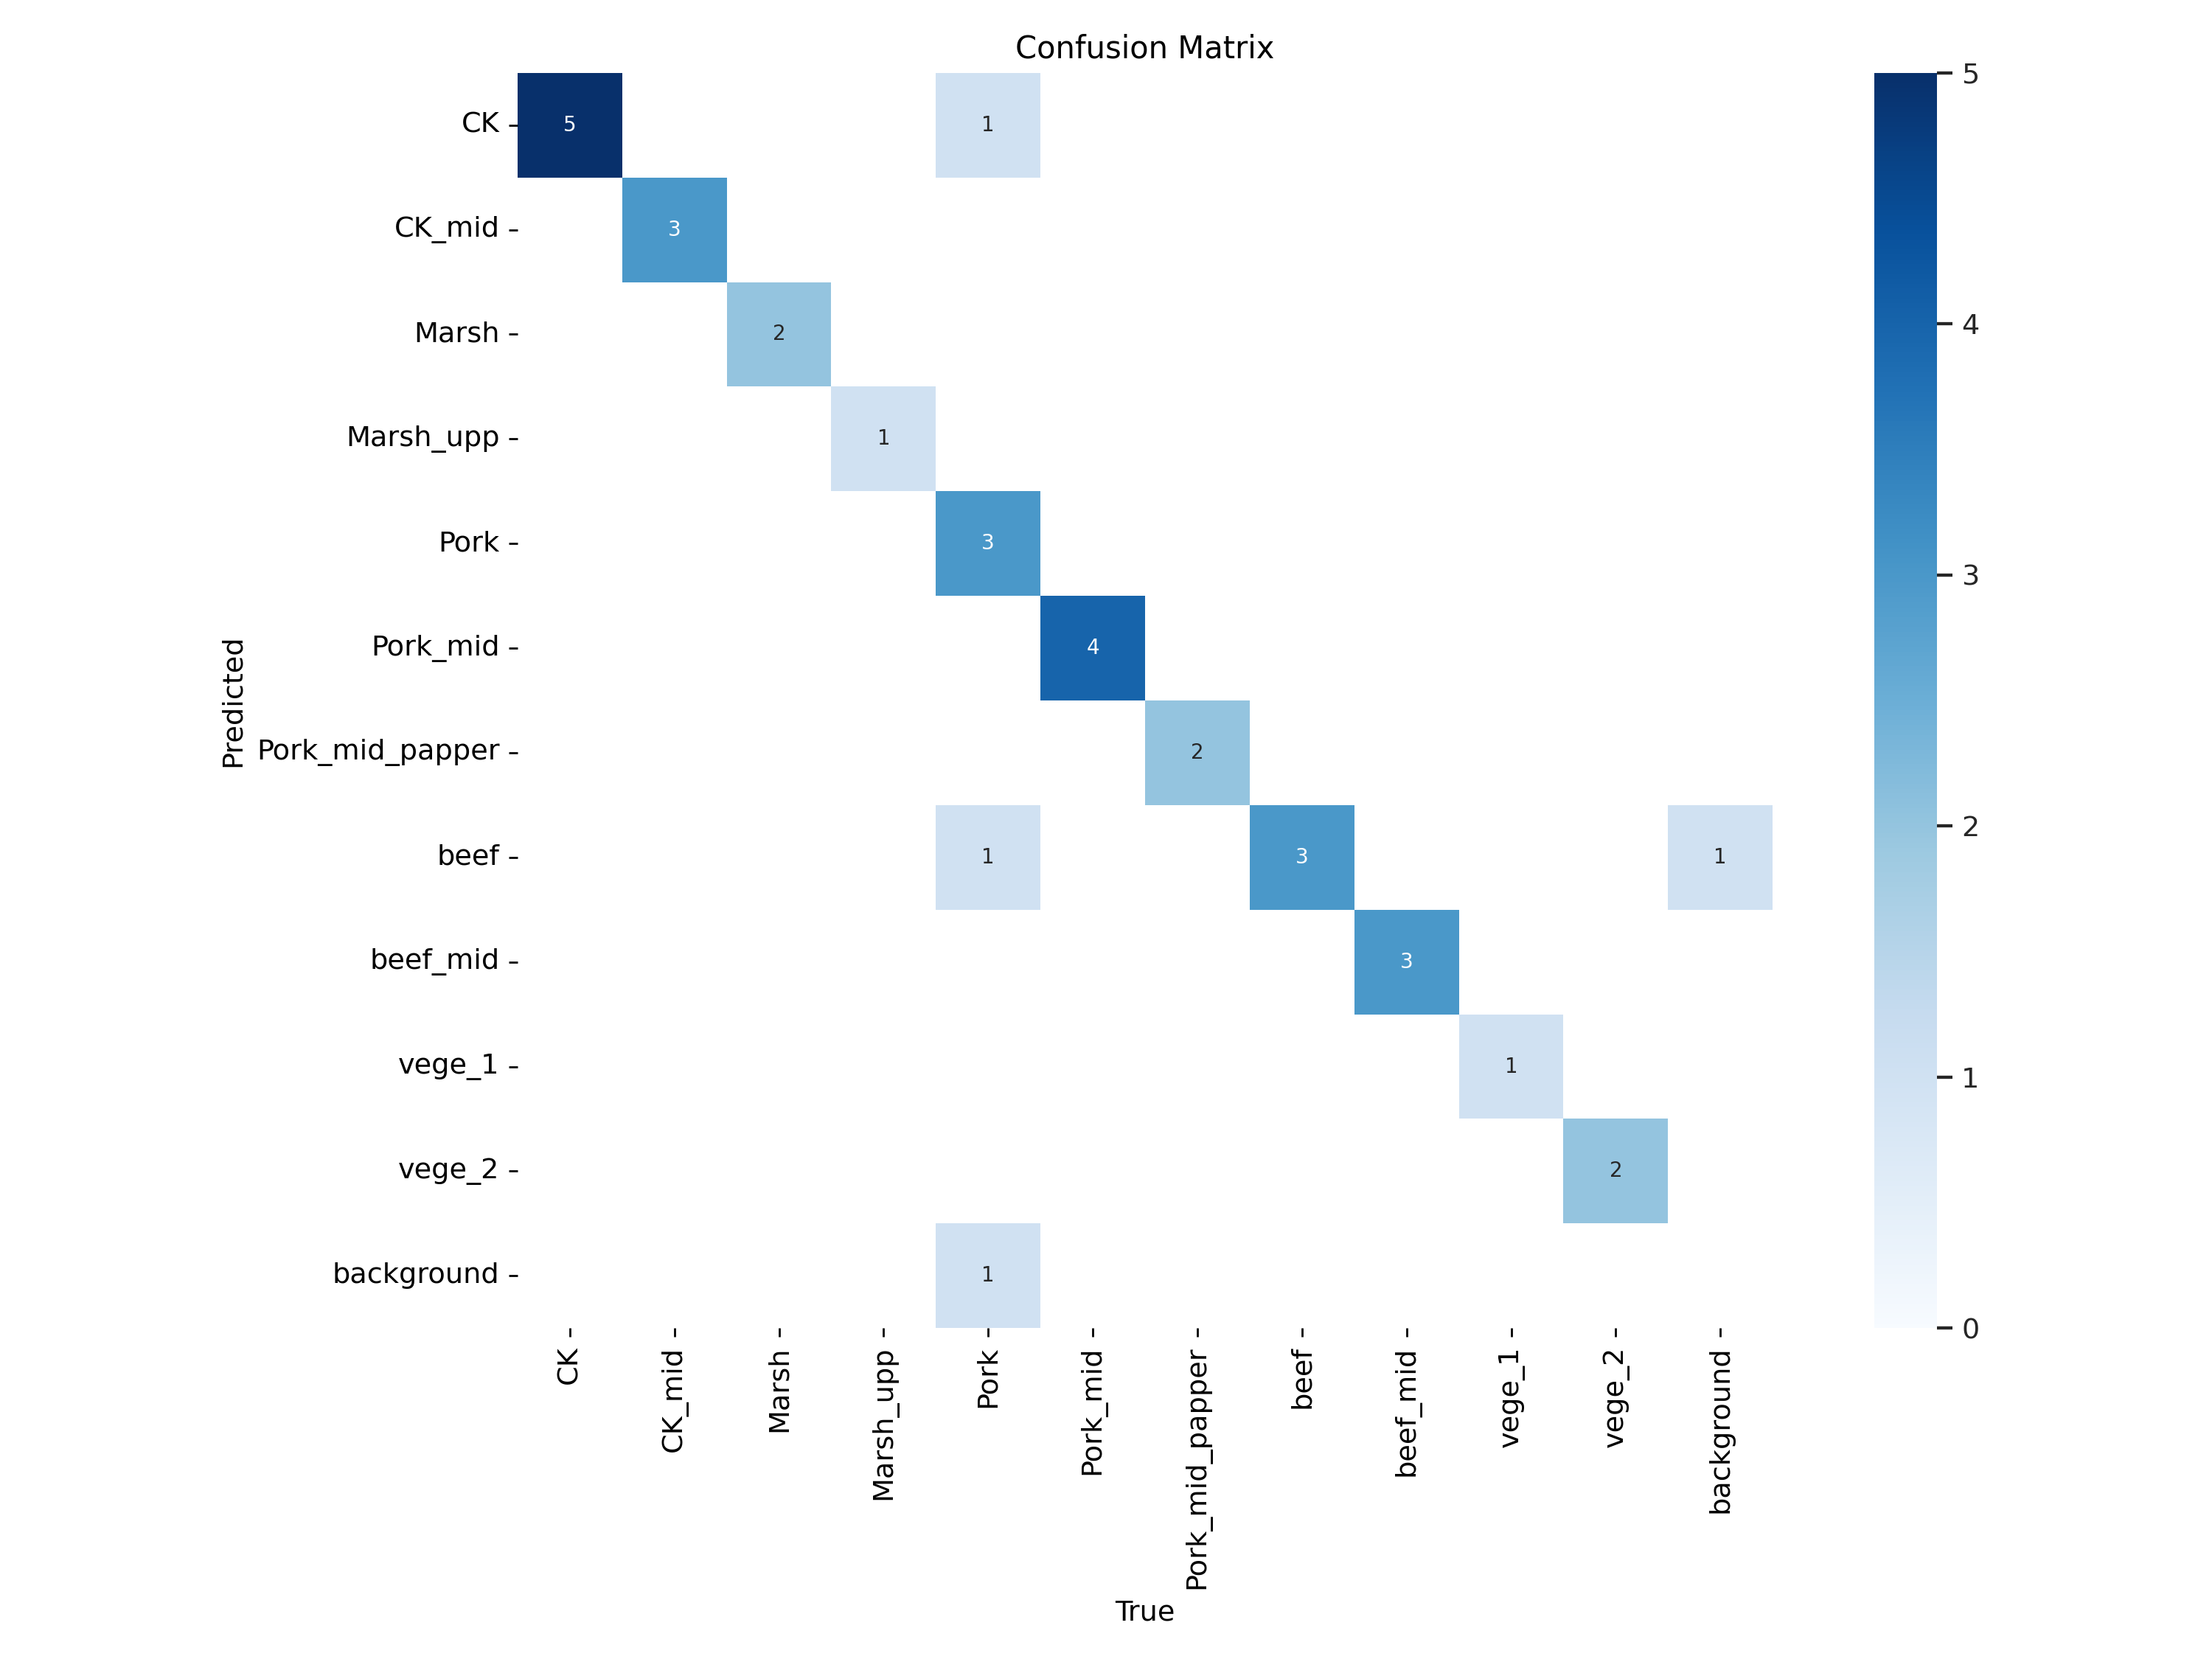

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/content


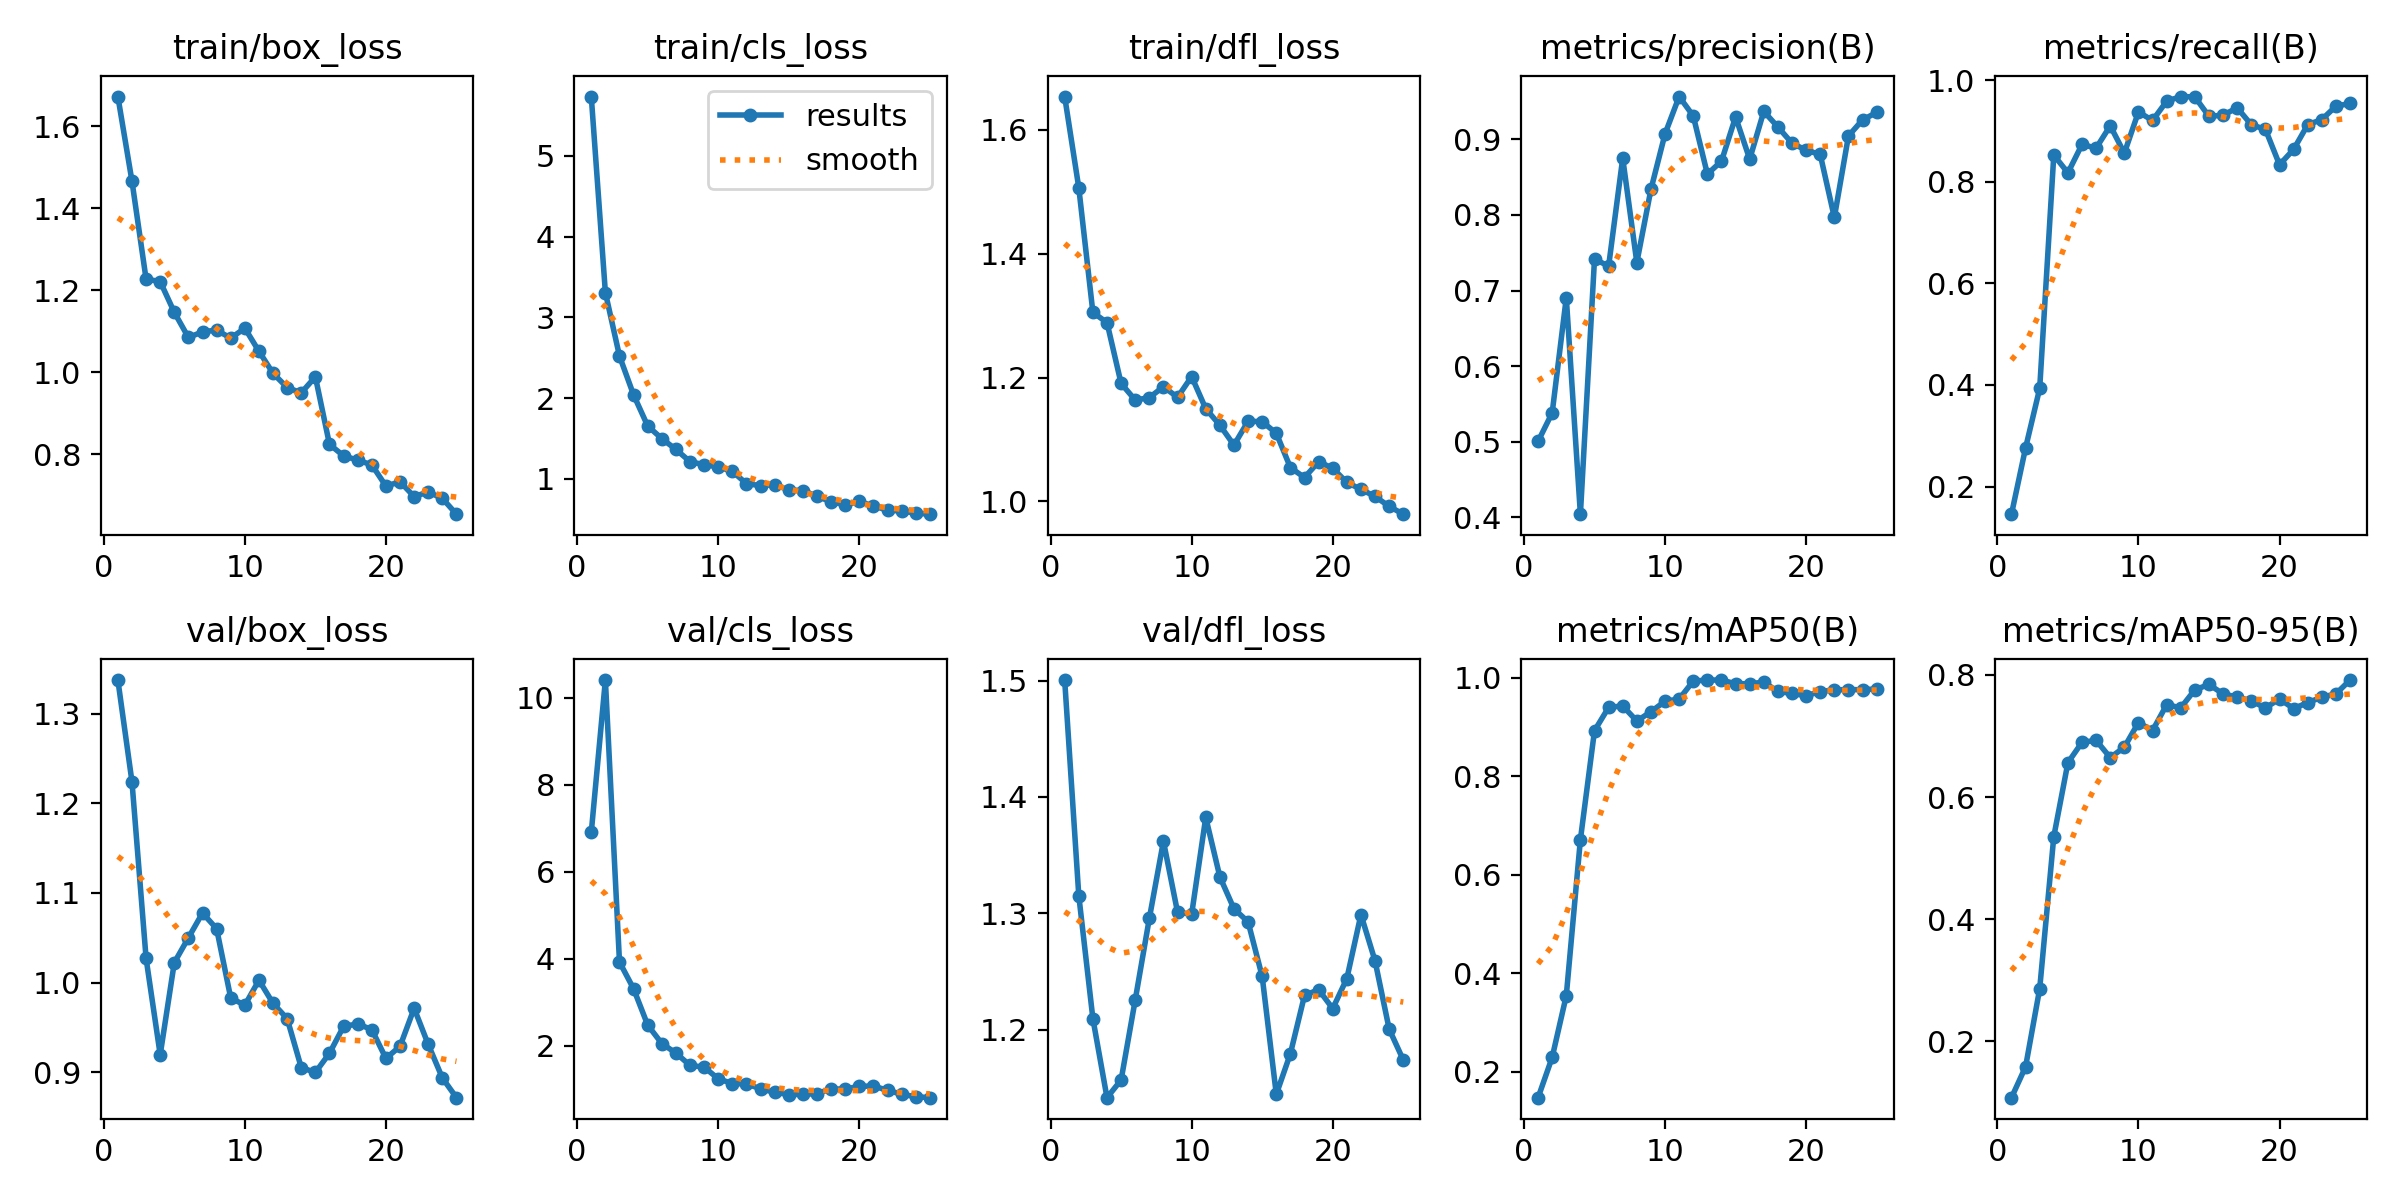

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


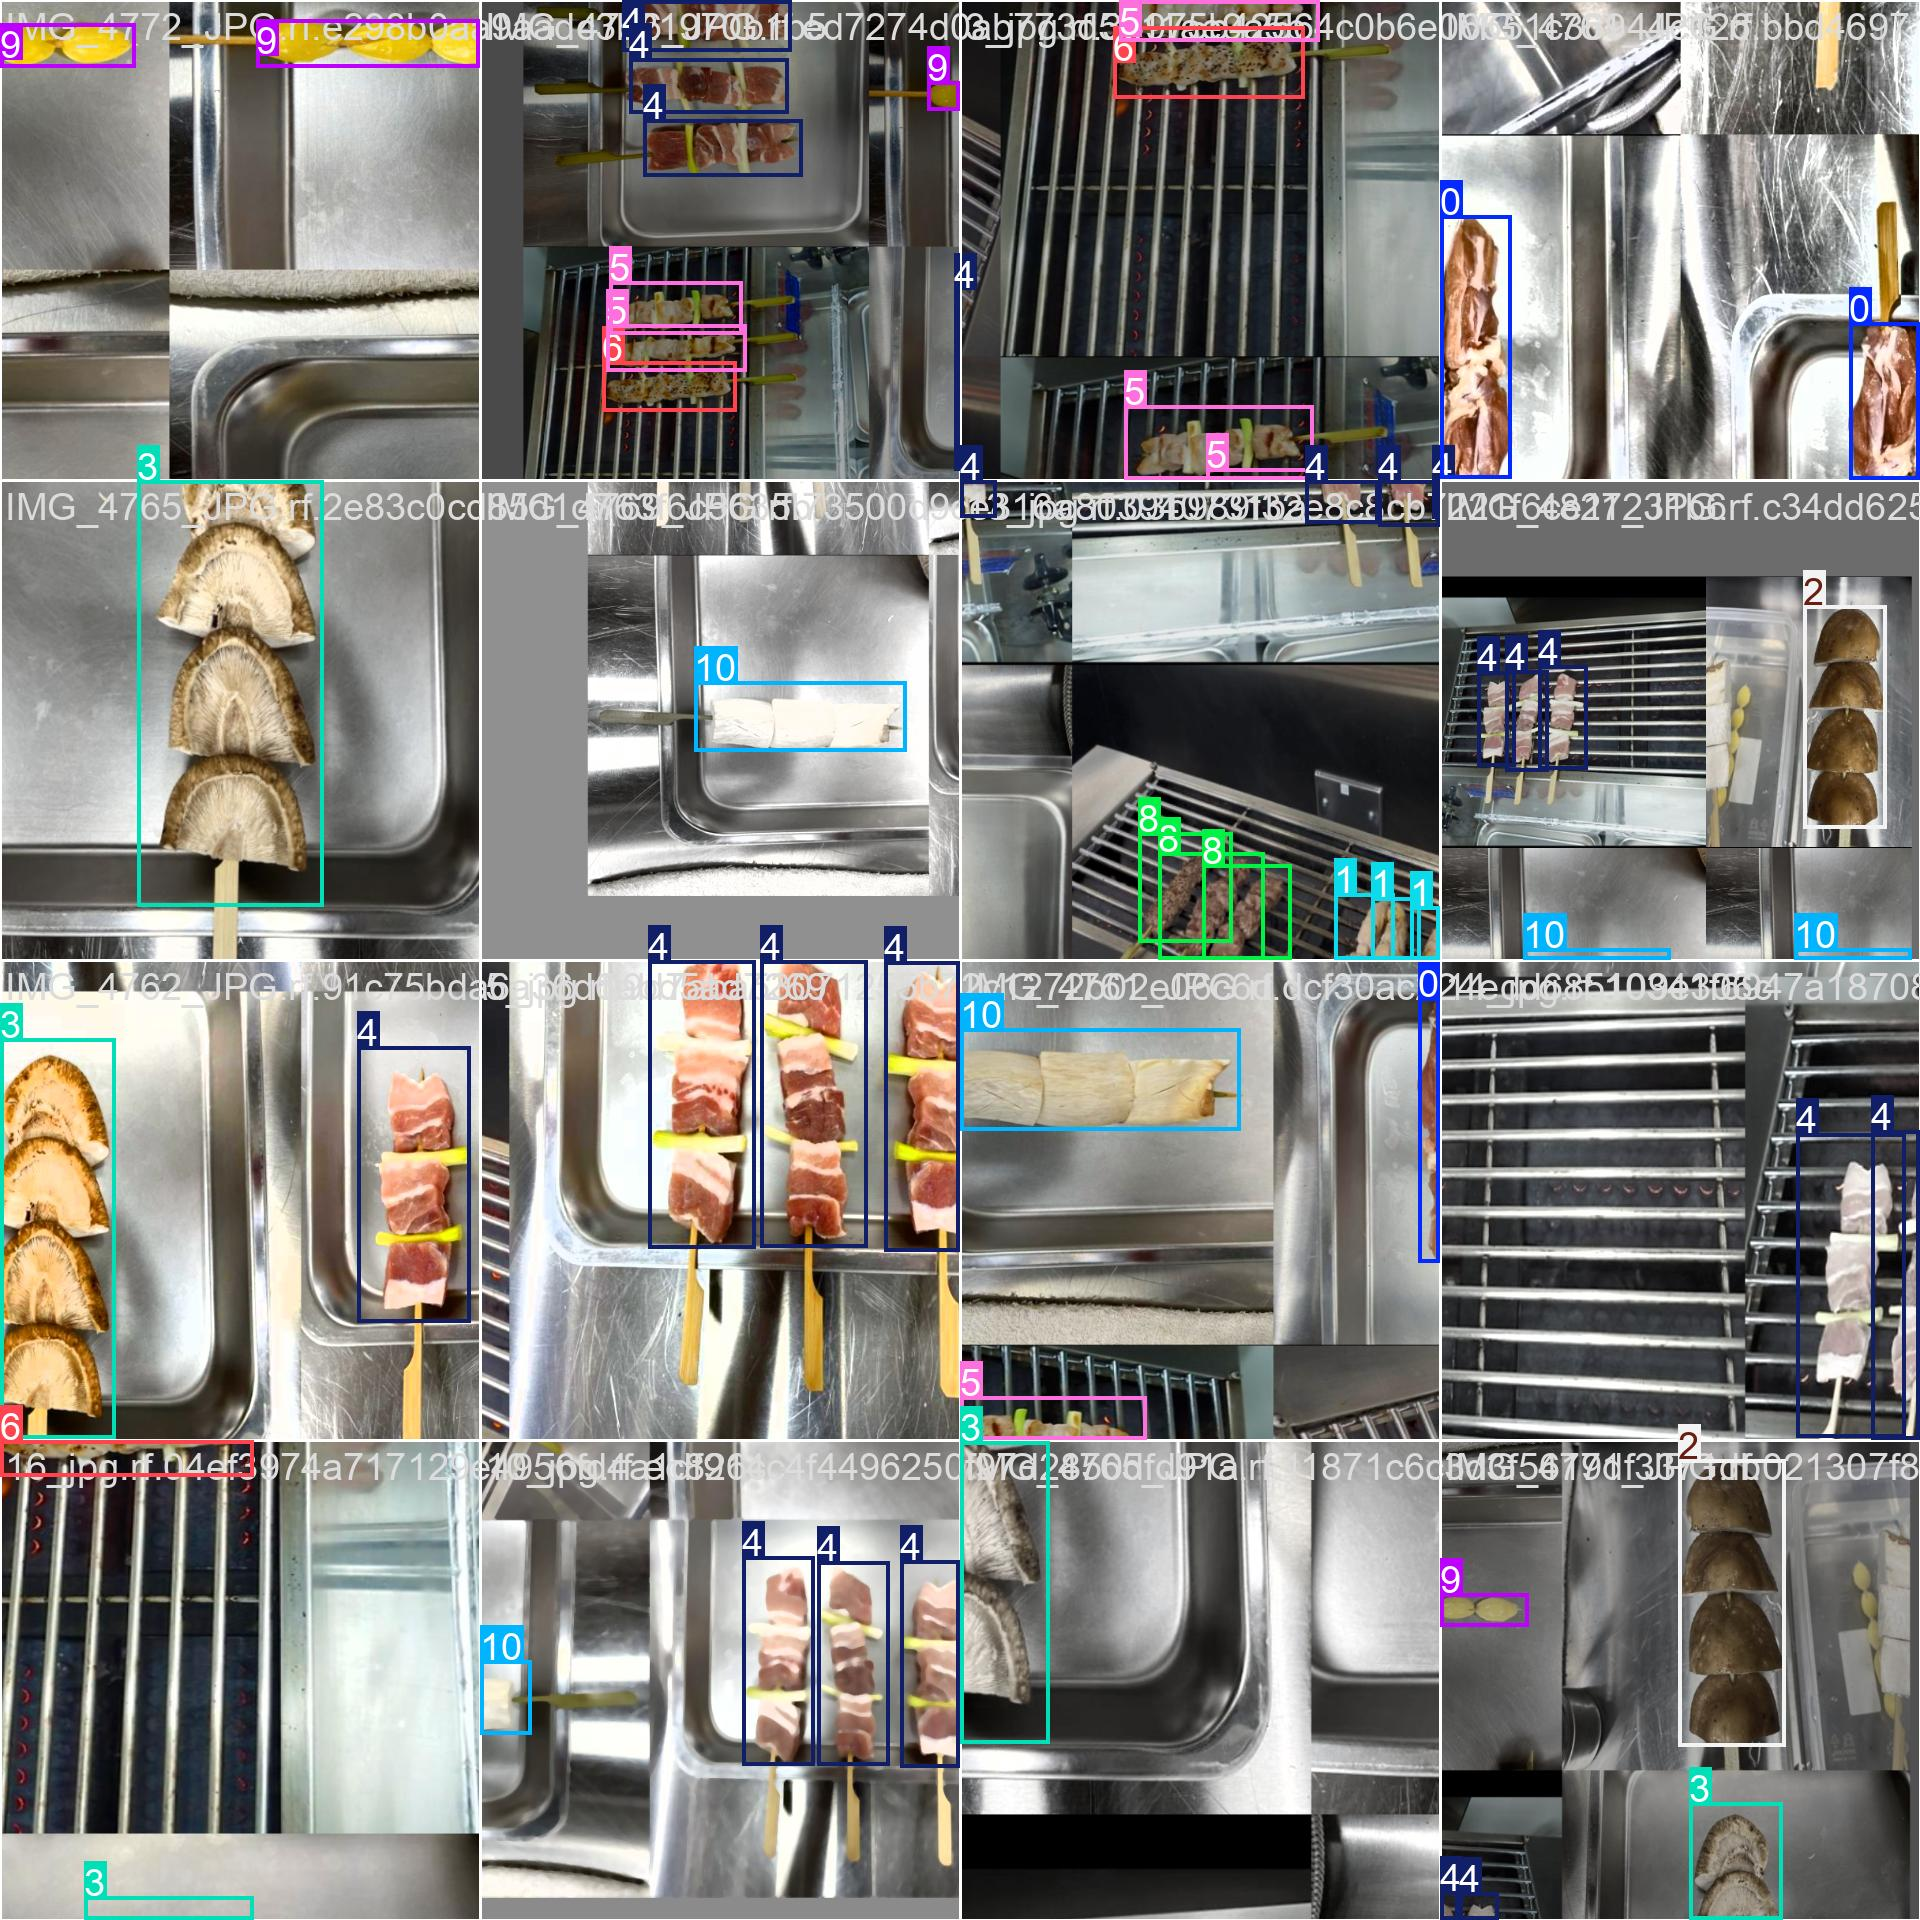

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/train_batch0.jpg', width=600)

In [21]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/BBQ_train-6/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100% 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:16<00:00, 16.11s/it]
                   all         14         32      0.936      0.954      0.977      0.792
                    CK          2          5      0.974          1      0.995      0.747
                CK_mid          1          3      0.967          1      0.995      0.781
                 Marsh          2          2      0.937          1      0.995      0.895
             Marsh_upp          1          1       0.93          1      0.995      0.895
                  Pork          2          6          1      0.492      0.797      0.643
              Pork_mid          2          

In [22]:
from ultralytics import YOLO

model = YOLO(f'{HOME}/runs/detect/train3/weights/best.pt')
source = "/content/drive/MyDrive/test/pigtest2.mp4"
result = model.predict(source,conf=0.5,stream=False, save=True)
print(result)


串流輸出內容已截斷至最後 5000 行。
       [[169, 161, 142],
        [169, 161, 142],
        [170, 162, 143],
        ...,
        [242, 245, 235],
        [242, 245, 235],
        [242, 245, 235]],

       [[166, 158, 139],
        [166, 158, 139],
        [166, 158, 139],
        ...,
        [242, 245, 235],
        [242, 245, 235],
        [242, 245, 235]]], dtype=uint8)
orig_shape: (1080, 1920)
path: '/content/drive/MyDrive/test/pigtest2.mp4'
probs: None
save_dir: 'runs/detect/predict'
speed: {'preprocess': 3.773212432861328, 'inference': 361.07563972473145, 'postprocess': 1.2199878692626953}, ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'CK', 1: 'CK_mid', 2: 'Marsh', 3: 'Marsh_upp', 4: 'Pork', 5: 'Pork_mid', 6: 'Pork_mid_papper', 7: 'beef', 8: 'beef_mid', 9: 'vege_1', 10: 'vege_2'}
obb: None
orig_img: array([[[ 30,  24,  19],
        [ 30,  24,  19],
        [ 30,  24,  19],
        ...,
      

In [23]:
!ls runs/detect/predict


pigtest2.avi


In [ ]:
#play .avi_video
from moviepy.editor import *

path="/content/drive/MyDrive/test/pork_predict_1211.avi"

clip=VideoFileClip(path)
clip.ipython_display(width=360)

In [24]:
#Hosted Video Inference

from roboflow import Roboflow

rf = Roboflow(api_key="dtwNUuXg0FCzWcJKWYI0")
project = rf.workspace("softstarglory").project("bbq_train")
model = project.version("7").model

job_id, signed_url, expire_time = model.predict_video(
    "/content/drive/MyDrive/test/pigtest2.mp4",
    fps=5,
    prediction_type="batch-video",
)

results = model.poll_until_video_results(job_id)

print(results)

loading Roboflow workspace...
loading Roboflow project...
Checking for video inference results for job aa3085db-0d81-474a-9a88-2595a338c029 every 60s
(0s): Checking for inference results
{'frame_offset': [0, 5, 11, 17, 23, 29, 35, 41, 47, 53, 59, 65, 71, 77, 83, 89, 95, 101, 107, 113, 119, 125, 131, 137, 143, 149, 155, 161, 167, 173, 179, 185, 191, 197, 203, 209, 215, 221, 227, 233, 239, 245, 251, 257, 263, 269, 275, 281, 287, 293, 299, 305, 311, 317, 323, 329, 335, 341, 347, 353, 359, 365, 371, 377, 383, 389, 395, 401, 407, 413, 419, 425, 431, 437, 443, 449, 455, 461, 467, 473, 479, 485, 491, 497, 503, 509, 515, 521, 527, 533, 539, 545, 551, 557, 563, 569, 575, 581, 587, 593, 599, 605, 611, 617, 623, 629, 635, 641, 647, 653, 659, 665, 671, 677, 683, 689, 695, 701, 707, 713, 719, 725, 731, 737, 743, 749, 755, 761, 767, 773, 779, 785, 791, 797, 803, 809, 815, 821, 827, 833, 839, 845, 851, 857, 863, 869, 875, 881, 887, 893, 899, 905, 911, 917, 923, 929, 935, 941, 947, 953, 959, 965, 971,